#### Created by : Muhammad Mukhlish Haq

#### Email : mukhlishaq22@gmail.com

#### Linkedin : linkedin.com/in/muhammad-mukhlish-haq

#### Github : github.com/MukhlishHaq

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

### IMPORT DATASET

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv("Dataset/hotel_bookings_data.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,NaN,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,NaN,0,Personal,98,0,1,Check-Out


#### Dataset Information

In [3]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (119390, 29)
Number of rows : 119390
Number of columns : 29


In [4]:
# menampilkan informasi dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data PreProcessing

### Handling Missing Value

In [5]:
# Jumlah data NULL di setiap kolom
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
print('Missing values status:', df.isnull().values.any())
mv = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
mv['Percentage'] = (mv['Total Null Values']/df.shape[0])*100
mv["Data Type"] = [df[col].dtype for col in df.columns]
mv.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(mv)

Missing values status: True
                                Total Null Values  Percentage Data Type
company                                    112593      94.307    object
agent                                       16340      13.686     int64
city                                          488       0.409     int64
children                                        4       0.003   float64
hotel                                           0           0    object
required_car_parking_spaces                     0           0     int64
adr                                             0           0     int64
customer_type                                   0           0     int64
days_in_waiting_list                            0           0    object
deposit_type                                    0           0     int64
booking_changes                                 0           0     int64
previous_bookings_not_canceled                  0           0     int64
previous_cancellations              

In [7]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    copy_col = df[i].apply(lambda x : str(x).strip())
    isnan = copy_col.isin(missing_values).any()
    missing = np.unique(copy_col[copy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, missing))

children = True - ['nan']
city = True - ['nan']
agent = True - ['nan']
company = True - ['nan']


<Figure size 800x400 with 0 Axes>

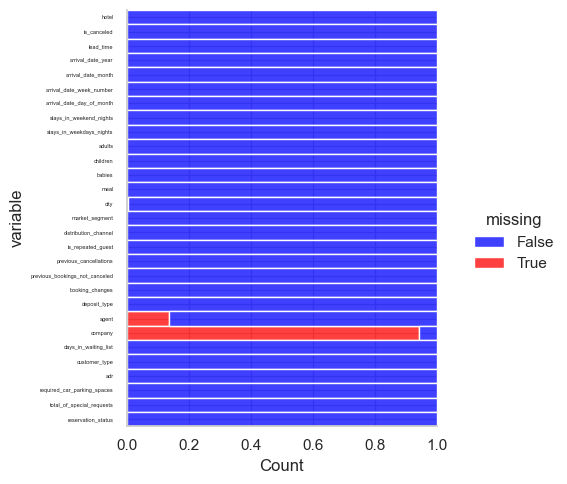

In [8]:
plt.figure(figsize=(8,4))

cmv = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["blue","red"]
)

cmv.set_yticklabels(size = 4)

In [9]:
# Isi dengan nilai nol pada kolom Company karena tidak ada perusahaan yang bersangkutan
df['company'] = df['company'].fillna(0)
# Isi dengan nilai nol pada kolom Agent karena tidak ada agen yang bersangkutan
df['agent'] = df['agent'].fillna(0)
# Isi dengan nilai nol pada kolom Children karena pelanggan tidak memiliki anak
df['children'] = df['children'].fillna(0)
# Isi dengan 'unknown' untuk kolom City yang tidak tersedia
df['city'] = df['city'].fillna('unknown')

In [10]:
# Jumlah Null setelah handling missing values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling Duplicate Rows

In [11]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,0,0,0,Family,145,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,0,0,0,Family,145,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,0,0,0,Family,145,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,0,0,Breakfast,Kabupaten Blora,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,130,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,0,0,Breakfast,Kabupaten Blora,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,130,0,0,Check-Out


In [12]:
print("Number of duplicate rows :", df.duplicated().sum())

Number of duplicate rows : 33261


### Change the Some column data type

In [13]:
#ubah data bertipe float64 yang sebelumnya memiliki nilai Null yaitu children, agent, and company mnejadi tipe int64
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [14]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  

### Handling invalid values

In [15]:
# Cek nilai unik yang ada di dalam data 
for x in df.columns : 
    unq = list(df[x].unique())
    unq.sort()
    
    print (f'===== {x} =====')
    if len(unq) >= 13:
        prt = list(unq[:12])+['.....']
        print (f'{prt}')
    else:
        print (f'{unq}')
    print()

===== hotel =====
['City Hotel', 'Resort Hotel']

===== is_canceled =====
[0, 1]

===== lead_time =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== arrival_date_year =====
[2017, 2018, 2019]

===== arrival_date_month =====
['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

===== arrival_date_week_number =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== arrival_date_day_of_month =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== stays_in_weekend_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, '.....']

===== stays_in_weekdays_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== adults =====
[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, '.....']

===== children =====
[0, 1, 2, 3, 10]

===== babies =====
[0, 1, 2, 9, 10]

===== meal =====
['Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined']

===== city =====
['Kabupaten Aceh Jaya', 'Kabupaten Bandung', 'Kabupa

In [16]:
df["meal"].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

In [17]:
# Replacing the category 'Undefined' with 'No Meal'.
df['meal'] = df['meal'].replace(['Undefined'],'No Meal')
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

### Drop Unnecessary Data

In [19]:
print("Before Drop Unnecessary Data :")
print("Total Data = {} rows".format(df.shape[0]))

# Number of Customers / Guests (adults/children/babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('No Customers / Guest = {} rows'.format(df[df['total_guests'] <= 0].shape[0]))

# Total duration of the night (weekend/weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('No Duration of Stay = {} rows'.format(df[df['stay_duration'] <= 0].shape[0]))

# Negative values in ADR (Average Daily Rate)
print('Negative values in ADR (Average Daily Rate) = {} rows'.format(df[df['adr'] < 0].shape[0]))

print("After Drop Unnecessary Data :")

# Filter the data according to the requirements 
df_clean = df[(df['total_guests'] > 0) & 
              (df['stay_duration'] > 0) &
              ~(df['adr'] < 0)]

print("Total Data = {} rows".format(df_clean.shape[0]))

Before Drop Unnecessary Data :
Total Data = 119390 rows
No Customers / Guest = 180 rows
No Duration of Stay = 715 rows
Negative values in ADR (Average Daily Rate) = 1 rows
After Drop Unnecessary Data :
Total Data = 118564 rows


### Grouping based on data type

In [27]:
categorical = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal',
            'city', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'deposit_type',
            'agent', 'company', 'customer_type', 'reservation_status']
            
numerical = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
            'stays_in_weekdays_nights', 'adults', 'children', 'babies',
            'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_guests', 'stay_duration']

# Statistical Summary

### Numerical

In [32]:
print('The number of numerical is {}'.format(len(numerical)))

n = int(len(numerical)/2)
df[numerical[:n]].describe().fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical is 17


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies
count,119390,119390,119390,119390,119390,119390,119390,119390
mean,104.011,27.165,15.798,0.928,2.500,1.856,0.104,0.008
std,106.863,13.605,8.781,0.999,1.908,0.579,0.399,0.097
min,0,1,1,0,0,0,0,0
25%,18,16,8,0,1,2,0,0
50%,69,28,16,1,2,2,0,0
75%,160,38,23,2,3,2,0,0
max,737,53,31,19,50,55,10,10


### Categorical

In [38]:
print('The number of categorical features is {}'.format(len(categorical)))

The number of categorical features is 14


In [39]:
dfcat = df.copy()

for i in categorical:
    dfcat[i] = dfcat[i].astype("category")
    
dfcat[categorical].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2018,56707
arrival_date_month,119390,12,October,13877
meal,119390,4,Breakfast,92310
city,119390,178,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
deposit_type,119390,3,No Deposit,104641


In [40]:
for i in categorical:
    print(i)
    print(dfcat[i].value_counts().iloc[:10])
    print()

hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

is_canceled
is_canceled
0    75166
1    44224
Name: count, dtype: int64

arrival_date_year
arrival_date_year
2018    56707
2019    40687
2017    21996
Name: count, dtype: int64

arrival_date_month
arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
Name: count, dtype: int64

meal
meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: count, dtype: int64

city
city
Kota Denpasar                 48590
Kabupaten Bangka              12129
Kota Yogyakarta               10415
Kota Batu                      8568
Kabupaten Bandung              7287
Kabupaten Kepulauan Seribu     3766
Kota Malang                    3375
Kabupaten Magelang             2342
Kota Jakarta Barat             2224
Kabupaten Belitung             21

# Exploring Business Insight

### Monthly Hotel Booking Analysis Based on Hotel Type

In [41]:
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2


In [42]:
df_clean["arrival_date_num_month"] = pd.to_datetime(df_clean['arrival_date_month'], format='%B').dt.month

In [43]:
dfgroup = df_clean.groupby(["hotel", "arrival_date_month", "arrival_date_num_month", "arrival_date_year"]) \
        .agg({"hotel":"count"}) \
        .rename(columns={"hotel": "total_booking"}) \
        .reset_index()

dfgroup.sort_values(by=["hotel", "arrival_date_num_month", "arrival_date_year", ], inplace=True)
dfgroup.drop("arrival_date_num_month", axis=1, inplace=True)
dfgroup.set_index(["hotel", "arrival_date_month", "arrival_date_year"])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                        1225
                                2018                        3084
             February           2017                        1637
                                2018                        2460
             March              2018                        1355
                                2019                        2357
             April              2018                        2347
                                2019                        2570
             May                2018                        3028
                                2019                        3383
             June               2018                        3549
                                2019                        3909
             July               2018                        3640
                                2019                        4544
             August             2018                        3914
                                2019                        3960
             September          2017                        1393
                                2018                        3107
                                2019                        3554
             October            2017                        2471
                                2018                        3362
                                2019                        3119
             November           2017                        3516
                                2018                        3861
             December           2017                        3368
                                2018                        4186
Resort Hotel January            2017                        1088
                                2018                        1315
             February           2017                        1239
                                2018                        1353
             March              2018                         866
                                2019                        1293
             April              2018                        1509
                                2019                        1572
             May                2018                        1754
                                2019                        1550
             June               2018                        1848
                                2019                        1739
             July               2018                        1773
                                2019                        1747
             August             2018                        1345
                                2019                        1672
             September          2017                        1361
                                2018                        1427
                                2019                        1744
             October            2017                        1392
                                2018                        1672
                                2019                        1796
             November           2017                        1582
                                2018                        1518
             December           2017                        1548
                                2018                        1962

In [44]:
df_booking = df_clean.groupby(["hotel","arrival_date_month", "arrival_date_num_month"]) \
                  .agg({"arrival_date_year":["nunique","count"]}) \
                  .reset_index()

df_booking.columns = ["hotel_type","arrival_month", "arrival_num_month", "num_year", "total_booking"]
df_booking

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
0,City Hotel,April,4,2,4917
1,City Hotel,August,8,2,7874
2,City Hotel,December,12,2,7554
3,City Hotel,February,2,2,4097
4,City Hotel,January,1,2,4309
5,City Hotel,July,7,2,8184
6,City Hotel,June,6,2,7458
7,City Hotel,March,3,2,3712
8,City Hotel,May,5,2,6411
9,City Hotel,November,11,2,7377


In [50]:
# Normalisasi data. Perhatikan untuk data bulan september dan oktober.
df_booking[df_booking["num_year"] != 2]
df_booking['avg_booking'] = round(df_booking['total_booking'] / df_booking['num_year'])
df_booking

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking,total_avg_booking,percentage
0,City Hotel,April,4,2,4917,2458,36614,6.710
1,City Hotel,August,8,2,7874,3937,36614,10.750
2,City Hotel,December,12,2,7554,3777,36614,10.320
3,City Hotel,February,2,2,4097,2048,36614,5.590
4,City Hotel,January,1,2,4309,2154,36614,5.880
5,City Hotel,July,7,2,8184,4092,36614,11.180
6,City Hotel,June,6,2,7458,3729,36614,10.180
7,City Hotel,March,3,2,3712,1856,36614,5.070
8,City Hotel,May,5,2,6411,3206,36614,8.760
9,City Hotel,November,11,2,7377,3688,36614,10.070


In [47]:
# Hitung persentasenya untuk melakukan perbandingan agar lebih ter interpretasi
hotels_booking = df_booking.groupby('hotel_type').agg({'avg_booking':'sum'})
hotels_booking.rename(columns={'avg_booking':'total_avg_booking'}, inplace=True)
hotels_booking

,total_avg_booking
hotel_type,
City Hotel,36614
Resort Hotel,18268


In [49]:
df_booking = df_booking.merge(hotels_booking, on='hotel_type')
df_booking['percentage'] = round((df_booking['avg_booking']/df_booking['total_avg_booking'])*100, 2)
df_booking

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking,total_avg_booking,percentage
0,City Hotel,April,4,2,4917,2458,36614,6.710
1,City Hotel,August,8,2,7874,3937,36614,10.750
2,City Hotel,December,12,2,7554,3777,36614,10.320
3,City Hotel,February,2,2,4097,2048,36614,5.590
4,City Hotel,January,1,2,4309,2154,36614,5.880
5,City Hotel,July,7,2,8184,4092,36614,11.180
6,City Hotel,June,6,2,7458,3729,36614,10.180
7,City Hotel,March,3,2,3712,1856,36614,5.070
8,City Hotel,May,5,2,6411,3206,36614,8.760
9,City Hotel,November,11,2,7377,3688,36614,10.070


In [51]:
# Urutkan data berdasarkan bulan, perhatikan penulisan nama bulan agar mudah saat proses visualisasi
df_booking.sort_values(by=["hotel_type", "arrival_num_month"], inplace=True)

sort = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
df_booking['arrival_month'] = pd.Categorical(df_booking['arrival_month'], 
                                          categories=sort, 
                                          ordered=True)
df_booking.reset_index(drop=True, inplace=True)
df_booking

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking,total_avg_booking,percentage
0,City Hotel,January,1,2,4309,2154,36614,5.880
1,City Hotel,February,2,2,4097,2048,36614,5.590
2,City Hotel,March,3,2,3712,1856,36614,5.070
3,City Hotel,April,4,2,4917,2458,36614,6.710
4,City Hotel,May,5,2,6411,3206,36614,8.760
5,City Hotel,June,6,2,7458,3729,36614,10.180
6,City Hotel,July,7,2,8184,4092,36614,11.180
7,City Hotel,August,8,2,7874,3937,36614,10.750
8,City Hotel,September,9,3,8054,2685,36614,7.330
9,City Hotel,October,10,3,8952,2984,36614,8.150


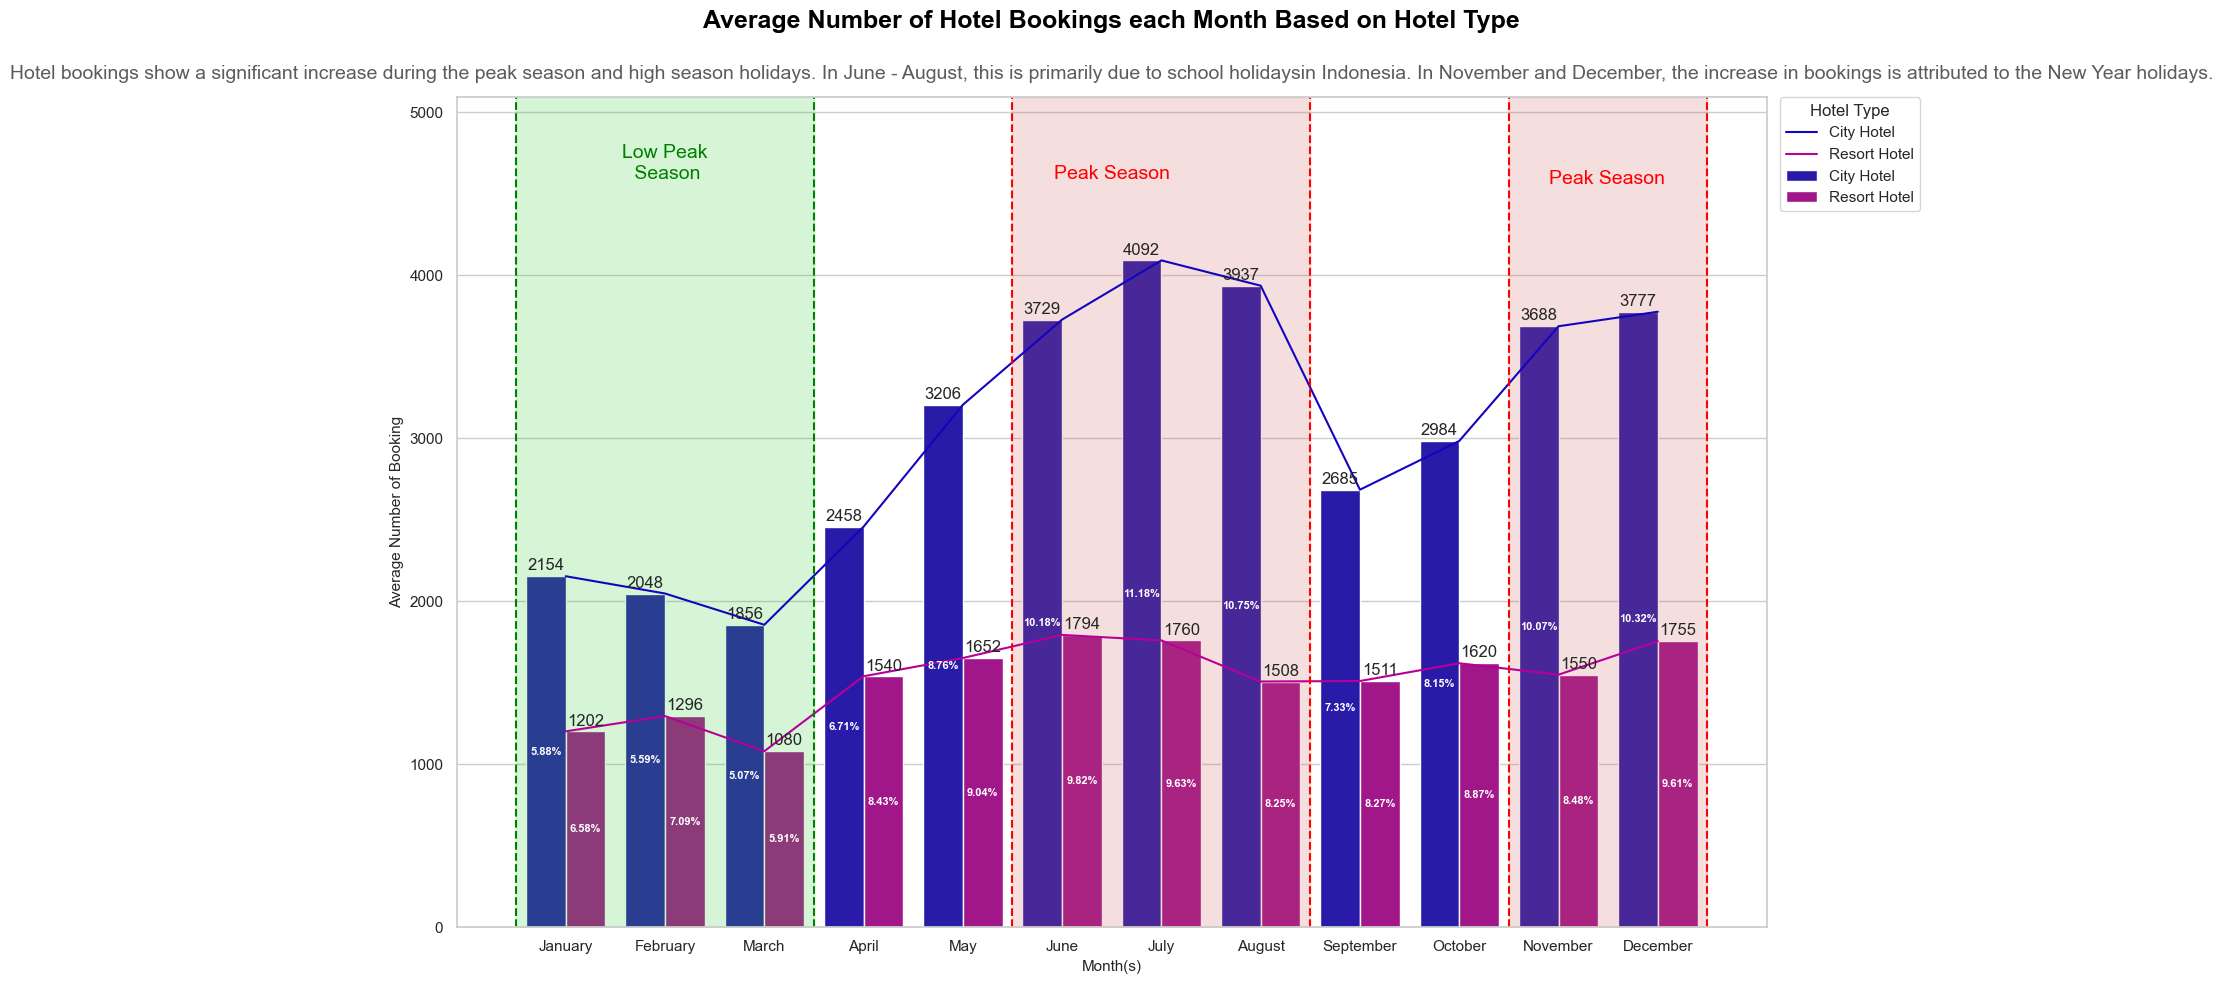

In [60]:
# Buat visualisasi dengan line plot untuk melihat peningkatan atau penurunan jumlah pemesanan hotel dalam tiap bulan berdasarkan tipe hotel
# Set figure & size
fig, ax = plt.subplots(figsize=(20, 10))

color = ['#1304bf', '#b80099']

# Create bar plot and line plot
sns.barplot(x='arrival_month', y ='avg_booking', 
            data=df_booking, hue='hotel_type', palette=color)

sns.lineplot(x='arrival_month', y ='avg_booking', 
             data=df_booking, hue='hotel_type', palette=color)


# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

for i, val in enumerate(df_booking["hotel_type"].unique()):
    labels = df_booking[df_booking["hotel_type"] == val]['percentage'].astype(str) + "%"
    plt.bar_label(ax.containers[i], labels,
              label_type='center', color='white', 
              weight='bold', fontsize=8)

    
# Create area plots for Peak Season and Low Peak Season
max_book = max(df_booking['avg_booking'])

plt.axvline(-0.5, ls='--', color='green')
plt.axvline(2.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,3.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=1, y=max_book+500, s='Low Peak\n Season', fontsize=14, color='green', ha='center')

plt.axvline(4.5, ls='--', color='red')
plt.axvline(7.5, ls='--', color='red')
plt.stackplot(np.arange(4.5,8.5), max_book+1000, color='indianred', alpha=0.2)
plt.text(x=5.5, y=max_book+500, s='Peak Season', fontsize=14, color='red', ha='center')

plt.axvline(9.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(9.5,12.5), max_book+1000, color='indianred', alpha=0.2)
plt.text(x=9.9, y=max_book+500, s='Peak Season', fontsize=14, color='red', va='center')


# Set title, labels & legend
plt.title("Average Number of Hotel Bookings each Month Based on Hotel Type", 
          fontsize=18, color='black', weight='bold', pad=50)
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0)

# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """Hotel bookings show a significant increase during the peak season and high season holidays. In June - August, this is primarily due to school holidaysin Indonesia. In November and December, the increase in bookings is attributed to the New Year holidays.
"""
ax.text((x_start+x_end)/2, y_end*0.95, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)


# Set axis limits
plt.ylim(0, max_book+1000)

# sns.despine() # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

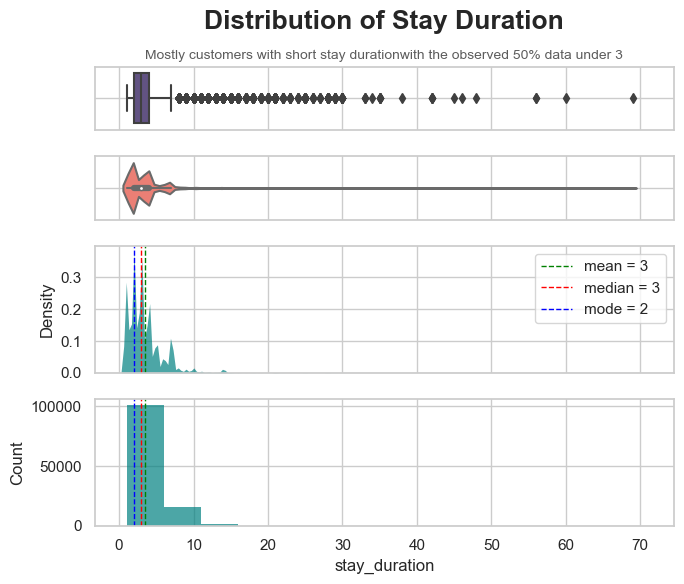

In [62]:
# Fokus pada kolom "stay duration", periksa distribusi data untuk menyederhanakan proses pengelompokan
fig, ax = plt.subplots(nrows=4, ncols=1, 
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3,3,6, 6]})

total_charges = df_clean["stay_duration"].dropna(axis=0) 

b = sns.boxplot(x=total_charges, ax=ax[0], color = "#5F4B8B")

v = sns.violinplot(x=total_charges, ax=ax[1], color="#FF6F61")

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill= True, 
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill= True, 
                alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ["mean", "median", "mode"]
colors = ["green", "red", "blue"]

for measurement, name, color in zip(measurements, names, colors):
        k.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        h.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        
# adding horizontal grid lines and format label
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)
    
b.set_title("Distribution of Stay Duration", 
          fontsize=19, fontweight='bold', pad=27)

# set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = "Mostly customers with short stay durationwith the observed 50% data under 3"
b.text((x_start+x_end)/2, y_end*1.25, desc,
        ha = 'center',fontsize = 10,  alpha = 0.75)

k.set_xlabel("Stay Duration")
k.legend()
plt.tight_layout()
plt.show()

In [65]:
# get stay duration group
def set_staydur_group(x):
    if x['stay_duration'] <= 7:
        return "<= 1 Week"
    elif x['stay_duration'] <= 14:
        return "2 Weeks"
    elif x['stay_duration'] <= 21:
        return "3 Weeks"
    return ">= 4 Weeks"

df_clean["stay_duration_group"] = df_clean.apply(lambda x: set_staydur_group(x), axis = 1)
df_clean["stay_duration_group"].unique()

array(['<= 1 Week', '2 Weeks', '3 Weeks', '>= 4 Weeks'], dtype=object)

In [67]:
df_clean['stay_duration_group'].value_counts()

stay_duration_group
<= 1 Week     113339
2 Weeks         4796
3 Weeks          274
>= 4 Weeks       155
Name: count, dtype: int64

In [68]:
# Bandingkan jumlah pemesanan hotel yang dibatalkan berdasarkan durasi menginap untuk setiap jenis hotel
df_cancel = df_clean.groupby(["hotel", "stay_duration_group", "is_canceled"]) \
                    .agg({"hotel":"count"}) \
                    .rename(columns={"hotel": "num_booking"}) \
                    .reset_index()

total_cancel = df_cancel.groupby(["hotel", "stay_duration_group"]) \
                  .agg({"num_booking":"sum"}) \
                  .rename(columns={"num_booking": "total_booking"}) \
                  .reset_index()

df_cancel = df_cancel.merge(total_cancel, on=["hotel", "stay_duration_group"])

df_cancel["cancellation_ratio"] = round((df_cancel["num_booking"]/df_cancel["total_booking"])*100, 2)

sort = ["<= 1 Week", "2 Weeks", "3 Weeks", ">= 4 Weeks"]
df_cancel["stay_duration_group"] = pd.Categorical(df_cancel["stay_duration_group"], 
                                          categories=sort, 
                                          ordered=True)

df_cancel.sort_values("stay_duration_group", inplace=True)
df_cancel.reset_index(drop=True, inplace=True)

df_cancel

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Week,0,45287,77678,58.300
1,City Hotel,<= 1 Week,1,32391,77678,41.700
2,Resort Hotel,<= 1 Week,0,25754,35661,72.220
3,Resort Hotel,<= 1 Week,1,9907,35661,27.780
4,City Hotel,2 Weeks,0,511,1069,47.800
5,City Hotel,2 Weeks,1,558,1069,52.200
6,Resort Hotel,2 Weeks,0,2649,3727,71.080
7,Resort Hotel,2 Weeks,1,1078,3727,28.920
8,City Hotel,3 Weeks,0,29,105,27.620
9,City Hotel,3 Weeks,1,76,105,72.380


In [69]:
# pilih data hotel yg dibatalkan
df_cancel_fix = df_cancel[df_cancel['is_canceled']==1]
df_cancel_fix

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
1,City Hotel,<= 1 Week,1,32391,77678,41.700
3,Resort Hotel,<= 1 Week,1,9907,35661,27.780
5,City Hotel,2 Weeks,1,558,1069,52.200
7,Resort Hotel,2 Weeks,1,1078,3727,28.920
9,City Hotel,3 Weeks,1,76,105,72.380
11,Resort Hotel,3 Weeks,1,79,169,46.750
13,City Hotel,>= 4 Weeks,1,41,47,87.230
15,Resort Hotel,>= 4 Weeks,1,46,108,42.590


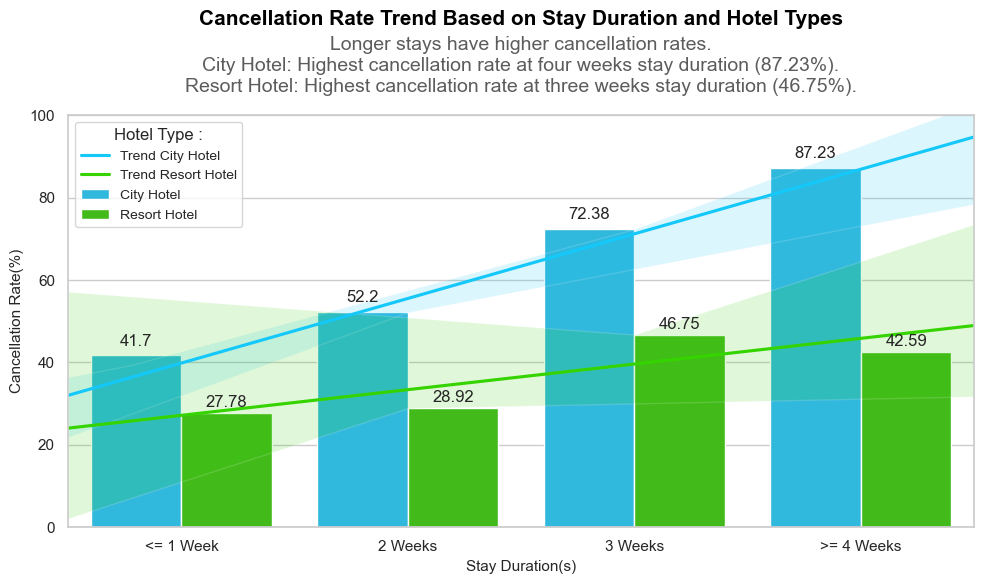

In [70]:
# Buat bar plot untuk menampilkan rasio pembatalan pemesanan berdasarkan durasi menginap untuk setiap jenis hotel
# Set figure & size
fig, ax = plt.subplots(figsize=(10, 6))

color = ['#14c8fa', '#35d400']
city_hotel = df_cancel_fix[df_cancel_fix['hotel'] == 'City Hotel']
resort_hotel = df_cancel_fix[df_cancel_fix['hotel'] == 'Resort Hotel']

# Create bar plot and regression plot
sns.barplot(x='stay_duration_group', y='cancellation_ratio', 
            data=df_cancel_fix, hue='hotel', palette=color)

sns.regplot(x=np.arange(0, len(city_hotel)), y='cancellation_ratio', 
            data=city_hotel, scatter=False, color=color[0],
            label = 'Trend City Hotel', truncate=False)

sns.regplot(x=np.arange(0, len(resort_hotel)), y='cancellation_ratio', 
            data=resort_hotel, scatter=False, color=color[1], 
            label='Trend Resort Hotel', truncate=False)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Stay Duration and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})


# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """Longer stays have higher cancellation rates.
City Hotel: Highest cancellation rate at four weeks stay duration (87.23%).
Resort Hotel: Highest cancellation rate at three weeks stay duration (46.75%)."""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Set axis limits
plt.ylim(0, 100)

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

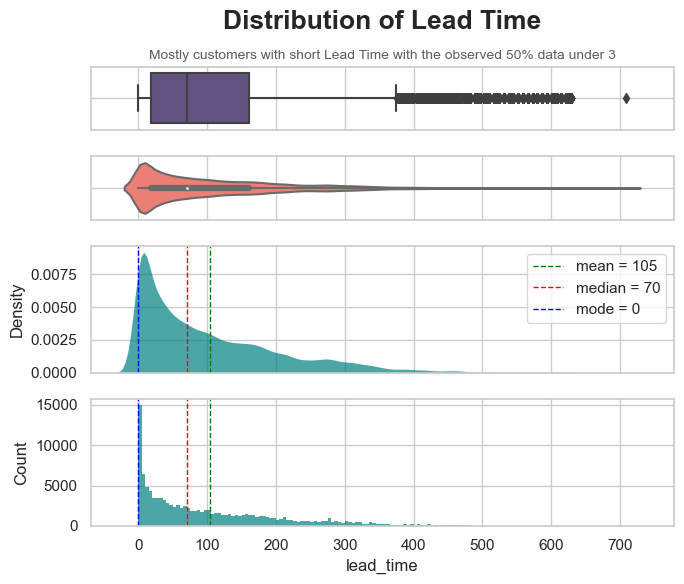

In [71]:
# Buat kolom baru berdasarkan lead time dengan interval
fig, ax = plt.subplots(nrows=4, ncols=1, 
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3,3,6, 6]})

total_charges = df_clean["lead_time"].dropna(axis=0) 

b = sns.boxplot(x=total_charges, ax=ax[0], color = "#5F4B8B")

v = sns.violinplot(x=total_charges, ax=ax[1], color="#FF6F61")

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill= True, 
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill= True, 
                alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ["mean", "median", "mode"]
colors = ["green", "red", "blue"]

for measurement, name, color in zip(measurements, names, colors):
        k.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        h.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        
# adding horizontal grid lines and format label
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)
    
b.set_title("Distribution of Lead Time", 
          fontsize=19, fontweight='bold', pad=27)

# set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = "Mostly customers with short Lead Time with the observed 50% data under 3"
b.text((x_start+x_end)/2, y_end*1.25, desc,
        ha = 'center',fontsize = 10,  alpha = 0.75)

k.set_xlabel("Lead Time")
k.legend()
plt.tight_layout()
plt.show()

In [72]:
# kelompokkan lead time
def set_leadtime_group(x):
    if x['lead_time'] <= 30:
        return '<= 1 Month'
    elif x['lead_time'] <= 120:
        return '2 - 4 Months'
    elif x['lead_time'] <= 210:
        return '5 - 7 Months'
    elif x['lead_time'] <= 300:
        return '8 - 10 Months'
    elif x['lead_time'] <= 360:
        return '11 - 12 Months'
    return '> 12 Months'

df_clean["lead_time_group"] = df_clean.apply(lambda x: set_leadtime_group(x), axis = 1)
df_clean["lead_time_group"].unique()

array(['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '> 12 Months',
       '11 - 12 Months', '8 - 10 Months'], dtype=object)

In [73]:
df_clean['lead_time_group'].value_counts()

lead_time_group
2 - 4 Months      39851
<= 1 Month        38094
5 - 7 Months      21618
8 - 10 Months     11122
11 - 12 Months     4467
> 12 Months        3412
Name: count, dtype: int64

In [74]:
df_cancel2 = df_clean.groupby(["hotel", "lead_time_group", "is_canceled"]) \
                    .agg({"hotel":"count"}) \
                    .rename(columns={"hotel": "num_booking"}) \
                    .reset_index()

total_cancel2 = df_cancel2.groupby(["hotel", "lead_time_group"]) \
                  .agg({"num_booking":"sum"}) \
                  .rename(columns={"num_booking": "total_booking"}) \
                  .reset_index()

df_cancel2 = df_cancel2.merge(total_cancel2, on=["hotel", "lead_time_group"])

df_cancel2["cancellation_ratio"] = round((df_cancel2["num_booking"]/df_cancel2["total_booking"])*100, 2)

sort = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']
df_cancel2["lead_time_group"] = pd.Categorical(df_cancel2["lead_time_group"], 
                                          categories=sort, 
                                          ordered=True)

df_cancel2.sort_values("lead_time_group", inplace=True)
df_cancel2.reset_index(drop=True, inplace=True)

df_cancel2

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,5174,23022,22.470
1,City Hotel,<= 1 Month,0,17848,23022,77.530
2,Resort Hotel,<= 1 Month,1,1976,15072,13.110
3,Resort Hotel,<= 1 Month,0,13096,15072,86.890
4,City Hotel,2 - 4 Months,0,16406,28189,58.200
5,City Hotel,2 - 4 Months,1,11783,28189,41.800
6,Resort Hotel,2 - 4 Months,1,3999,11662,34.290
7,Resort Hotel,2 - 4 Months,0,7663,11662,65.710
8,Resort Hotel,5 - 7 Months,1,2685,7269,36.940
9,City Hotel,5 - 7 Months,0,7298,14349,50.860


In [75]:
df_cancel_final2 = df_cancel2[df_cancel2['is_canceled']==1]
df_cancel_final2

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,5174,23022,22.470
2,Resort Hotel,<= 1 Month,1,1976,15072,13.110
5,City Hotel,2 - 4 Months,1,11783,28189,41.800
6,Resort Hotel,2 - 4 Months,1,3999,11662,34.290
8,Resort Hotel,5 - 7 Months,1,2685,7269,36.940
10,City Hotel,5 - 7 Months,1,7051,14349,49.140
12,Resort Hotel,8 - 10 Months,1,1723,3986,43.230
14,City Hotel,8 - 10 Months,1,4376,7136,61.320
16,Resort Hotel,11 - 12 Months,1,513,1128,45.480
17,City Hotel,11 - 12 Months,1,2608,3339,78.110


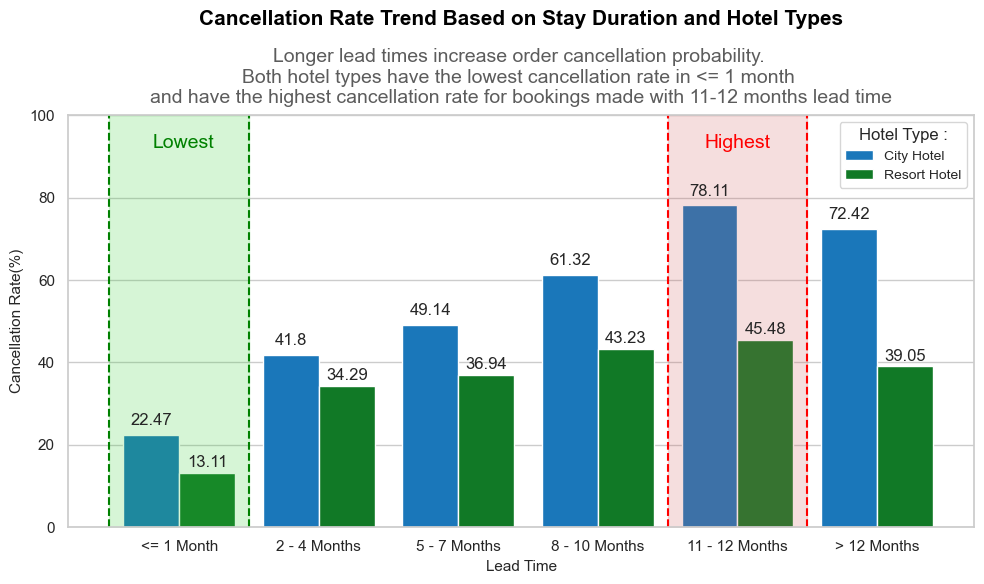

In [76]:
# Set figure & size
fig, ax = plt.subplots(figsize=(10, 6))

color = ['#007bd4', '#008a1c']
sorter = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']
city_hotel = df_cancel_final2[df_cancel_final2['hotel'] == 'City Hotel']
resort_hotel = df_cancel_final2[df_cancel_final2['hotel'] == 'Resort Hotel']

# Create bar plot and line plot
sns.barplot(x='lead_time_group', y='cancellation_ratio', 
            data=df_cancel_final2, hue='hotel', palette=color,
            order=sorter)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)


# Create area plots for Peak Season and Low Peak Season
plt.axvline(-0.5, ls='--', color='green')
plt.axvline(0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), 100, color='limegreen', alpha=0.2)
plt.text(x=0.03, y=92, s='Lowest', fontsize=14, color='green', ha='center')

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), 100, color='indianred', alpha=0.2)
plt.text(x=4, y=92, s='Highest', fontsize=14, color='red', ha='center')


# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Stay Duration and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Lead Time', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})


# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """Longer lead times increase order cancellation probability. 
Both hotel types have the lowest cancellation rate in <= 1 month 
and have the highest cancellation rate for bookings made with 11-12 months lead time"""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Set axis limits
plt.ylim(0, 100)

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

# Summary

- Keduanya menunjukkan tren peningkatan pemesanan yang mirip, dengan City Hotel mengalami puncak tertinggi. Pemesanan hotel meningkat secara signifikan selama musim liburan, terutama pada bulan Juni - Agustus dan November - Desember. City Hotel juga mengalami penurunan pemesanan yang signifikan pada bulan Januari - Maret dan Agustus - September. Untuk mengoptimalkan pemesanan, meningkatkan promosi dan memberikan diskon dapat menjadi strategi yang efektif untuk kedua hotel.

- City Hotel memiliki pembatalan tertinggi dengan tren peningkatan yang signifikan. Terdapat korelasi positif antara stay duration dan cancellation ratio untuk kedua hotel. Tingkat pembatalan tertinggi di City Hotel adalah untuk pemesanan dengan masa inap di atas 4 minggu, sedangkan tingkat tertinggi di Resort Hotel adalah untuk pemesanan dengan masa inap 3 minggu. Dengan menerapkan kebijakan pembatalan yang lebih ketat dan memberikan tawaran promosi khusus dapat membantu meminimalisir pembatalan.

- Waktu tunggu yang lebih lama memiliki korelasi dengan tingkat pembatalan yang lebih tinggi untuk City and Resort Hotel. Tingkat pembatalan terendah terjadi pada kategori waktu tunggu <= 1 bulan, sedangkan tingkat pembatalan tertinggi terjadi pada kategori waktu tunggu 11-12 bulan. Baik Resort dan City Hotel mengalami tingkat pembatalan tertinggi pada waktu tunggu 1 tahun. Menerapkan pengingat dan kebijakan pembatalan yang lebih ketat dapat membantu meminimalisir pembatalan dan meningkatkan efisiensi pemesanan secara keseluruhan.